- ## <font color = red> Smart City Traveller Recommendation :

> - ### This Travel Rating Data enable users to view the information of various places. The user can search the places with a category like 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo' etc. Users can view all the details of the places and they can give the description and rating to the place. All the details of places which include the description and ratings can be viewed by guest users.
> - ### By the user information we can give the suggetions regarding places to visit according to previous information or related places.

- ## Variable : 
- Attribute 1 : Unique user id
- Attribute 2 : Average ratings on churches
- Attribute 3 : Average ratings on resorts
- Attribute 4 : Average ratings on beaches
- Attribute 5 : Average ratings on parks
- Attribute 6 : Average ratings on theatres
- Attribute 7 : Average ratings on museums
- Attribute 8 : Average ratings on malls
- Attribute 9 : Average ratings on zoo
- Attribute 10 : Average ratings on restaurants
- Attribute 11 : Average ratings on pubs/bars
- Attribute 12 : Average ratings on local services
- Attribute 13 : Average ratings on burger/pizza shops
- Attribute 14 : Average ratings on hotels/other lodgings
- Attribute 15 : Average ratings on juice bars
- Attribute 16 : Average ratings on art galleries
- Attribute 17 : Average ratings on dance clubs
- Attribute 18 : Average ratings on swimming pools
- Attribute 19 : Average ratings on gyms
- Attribute 20 : Average ratings on bakeries
- Attribute 21 : Average ratings on beauty & spas
- Attribute 22 : Average ratings on cafes
- Attribute 23 : Average ratings on view points
- Attribute 24 : Average ratings on monuments
- Attribute 25 : Average ratings on gardens

In [2]:
import streamlit as st
import pandas as pd
from PIL import Image
from pycaret.classification import *
import pandas as pd


In [3]:
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [4]:
input_data = pd.read_csv('travel_review_ratings.csv')
input_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
input_data.shape

(5456, 26)

In [6]:
input_data.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

- ### Data Cleaning and Preprocessing :

In [7]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

#### There are only 2 non null values in the last column. There are only 24 categories described in the dataset description and the last column is not present there. So let's drop the column

In [8]:
input_data.drop('Unnamed: 25', axis = 1, inplace = True)

#### Renaming the columns for ease of understanding

In [9]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
input_data.columns = column_names

In [10]:
input_data.columns

Index(['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [11]:
input_data[column_names].isnull().sum()    # OR
# input_data.isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

#### There are two columns with one null value each. Let us impute the null values with 0 considering that the user didn't give rating to these categories

In [12]:
input_data = input_data.fillna(0)

In [13]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

- #### Converting the column 'local services' to float datatype.
#### There is a string present among the rows. Let's check how many rows have such values and convert them to float.

In [14]:
input_data['local_services'][input_data['local_services'] == '2\t2.']

2712    2\t2.
Name: local_services, dtype: object

#### There is only one row with that value. Let us replace that value with the mean of the rest of the rows.

In [15]:
local_services_mean = input_data['local_services'][input_data['local_services'] != '2\t2.']
input_data['local_services'][input_data['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
input_data['local_services'] = input_data['local_services'].astype('float64')

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
input_data.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

- ### EDA :

In [17]:
input_data[column_names[:12]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
input_data[column_names[12:]].describe()

,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
input_data_description = input_data.describe()
min_val = input_data_description.loc['min'] > 0
min_val[min_val]

2020-09-14 12:13:05.035 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

#### The above 10 categories have been given a rating by all the users as the minimum value is greater than 0

Text(0.5, 1.0, 'No of reviews under each category')

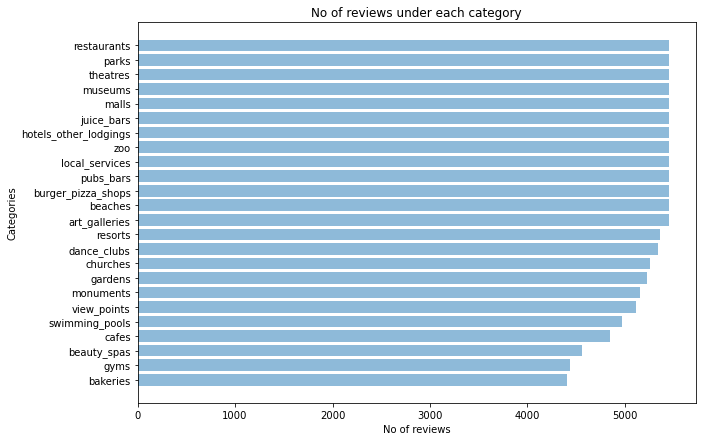

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
%matplotlib inline
no_of_zeros = input_data[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

#### Let us look at how many users have given rating for each category.

#### No of users given rating to bakeries and gyms are the least.

- ### Let us have a look at the summary of ratings given by users for various categories.

In [20]:
no_of_reviews = input_data[column_names[1:]].astype(bool).sum(axis=1).value_counts()

Text(0.5, 1.0, 'No of Categories vs No of reviews')

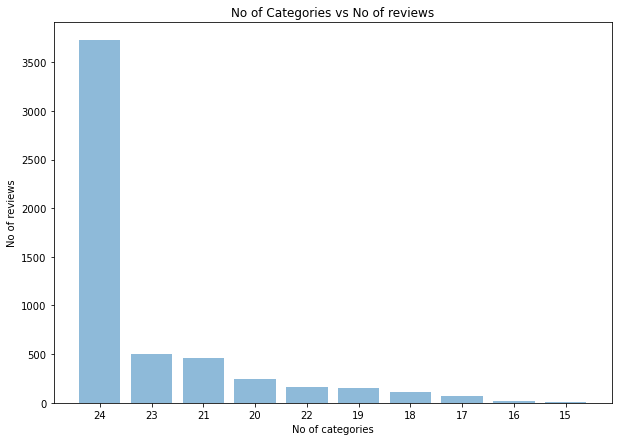

In [22]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

#### Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built.

In [20]:
avg_rating = input_data[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()

In [21]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

NameError: name 'plt' is not defined

#### Malls have the highest average rating and gyms have the lowest average rating implying that travellers prefer malls and least preferres is gym. We can even relate this to the common phenomena that gyms are not usually visited by tourists.

- ### Let us basket the different categories into higher levels and do an analysis to see if there is any influence of the type of the tourist attraction

In [22]:
entertainment = ['theatres', 'dance_clubs', 'malls']
food_travel = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
places_of_stay = ['hotels_other_lodgings', 'resorts']
historical = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
services = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']

In [23]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])
df_category_reviews

,entertainment,food_travel,places_of_stay,historical,nature,services


In [24]:
df_category_reviews['entertainment'] = input_data[entertainment].mean(axis = 1)
df_category_reviews['food_travel'] = input_data[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = input_data[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = input_data[historical].mean(axis = 1)
df_category_reviews['nature'] = input_data[nature].mean(axis = 1)
df_category_reviews['services'] = input_data[services].mean(axis = 1)

In [25]:
input_data[entertainment]

,theatres,dance_clubs,malls
0,5.00,0.59,5.00
1,5.00,0.59,5.00
2,5.00,0.59,5.00
3,5.00,0.59,5.00
4,5.00,0.59,5.00
...,...,...,...
5451,2.77,0.66,2.43
5452,2.78,0.65,1.77
5453,2.78,0.65,1.75
5454,2.79,0.64,1.76


In [26]:
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


#### Entertainment has the highest average rating and Services have the lowest rating implying that people are more interested in entertainment.

- ## Recommender Engines :
#### Let's try to build different types of recommendation engines with the given dataset.

- ### Approach 1: User Based Recommendation Engine

In [27]:
ratings_per_category_df = pd.DataFrame(input_data[column_names[1:]].mean()).reset_index(level=0)
ratings_per_category_df

,index,0
0,churches,1.455720
1,resorts,2.319707
2,beaches,2.489331
3,parks,2.796886
4,theatres,2.958941
5,museums,2.893490
6,malls,3.351395
7,zoo,2.540795
8,restaurants,3.126019
9,pubs_bars,2.832729


In [28]:
ratings_per_category_df.columns = ['category', 'avg_rating']

In [29]:
ratings_per_category_df['no_of_ratings'] = input_data[column_names[1:]].astype(bool).sum(axis=0).values.tolist()
ratings_per_category_df

,category,avg_rating,no_of_ratings
0,churches,1.455720,5261
1,resorts,2.319707,5366
2,beaches,2.489331,5452
3,parks,2.796886,5456
4,theatres,2.958941,5456
5,museums,2.893490,5456
6,malls,3.351395,5456
7,zoo,2.540795,5456
8,restaurants,3.126019,5456
9,pubs_bars,2.832729,5456


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ratings_per_category_df['avg_rating_scaled'] = scaler.fit_transform(ratings_per_category_df['avg_rating'].values.reshape(-1,1))
ratings_per_category_df['no_of_ratings_scaled'] = scaler.fit_transform(ratings_per_category_df['no_of_ratings'].values.reshape(-1,1))

In [31]:
def calculate_weighted_rating(x):
    return (0.5 * x['avg_rating_scaled'] + 0.5 * x['no_of_ratings_scaled'])

ratings_per_category_df['weighted_rating'] = ratings_per_category_df.apply(calculate_weighted_rating, axis = 1)
ratings_per_category_df = ratings_per_category_df.sort_values(by=['weighted_rating'], ascending = False)

In [32]:
ratings_per_category_df

,category,avg_rating,no_of_ratings,avg_rating_scaled,no_of_ratings_scaled,weighted_rating
6,malls,3.351395,5456,1.000000,1.000000,1.000000
8,restaurants,3.126019,5456,0.910883,1.000000,0.955441
4,theatres,2.958941,5456,0.844817,1.000000,0.922409
5,museums,2.893490,5456,0.818937,1.000000,0.909468
9,pubs_bars,2.832729,5456,0.794911,1.000000,0.897456
3,parks,2.796886,5456,0.780738,1.000000,0.890369
10,local_services,2.550071,5456,0.683144,1.000000,0.841572
7,zoo,2.540795,5456,0.679476,1.000000,0.839738
2,beaches,2.489331,5452,0.659126,0.996176,0.827651
14,art_galleries,2.206573,5452,0.547319,0.996176,0.771747


In [33]:
def get_recommendation_based_on_popularity(x):
    zero_cols = input_data[input_data['user_id'] == x['user_id']][column_names[1:]].astype(bool).sum(axis=0)
    zero_df = pd.DataFrame(zero_cols[zero_cols == 0]).reset_index(level = 0)
    zero_df.columns = ['category', 'rating']
    zero_df = pd.merge(zero_df, ratings_per_category_df, on = 'category', how = 'left')[['category', 'weighted_rating']]
    zero_df = zero_df.sort_values(by = ['weighted_rating'], ascending = False)
    if len(zero_df) > 0:
        return zero_df['category'].values[0]
    else:
        return ""

In [34]:
input_data_recommendation = input_data.copy()
input_data_recommendation['recommendation_based_on_popularity'] = input_data_recommendation.apply(get_recommendation_based_on_popularity, axis = 1)

In [35]:
input_data_recommendation['recommendation_based_on_popularity'][input_data['user_id'] == "User 10"]

9    gardens
Name: recommendation_based_on_popularity, dtype: object

- ### Approach 2: Collaborative Filtering ( Recommendation based on kNN )

In [36]:
from sklearn.neighbors import NearestNeighbors

In [37]:
input_data_matrix = input_data[column_names[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)

In [38]:
query_index = np.random.choice(input_data[column_names[1:]].shape[0])
distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)

In [39]:
def compare_df(index, ind):        
    zero_cols_in = input_data.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = input_data.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(input_data[column_names[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list
print(recommend_knn(18))   bbbn                       

['swimming_pools']


In [53]:
print(recommend_knn(55))   

['gyms']


- ### Approach 3 : Collaborative Filtering ( Recommendation based on Correlation ) :

In [40]:
input_data.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [41]:
corrMatrix = input_data.corr(method='pearson')
corrMatrix.head(10)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
churches,1.000000,0.248991,0.148805,0.070692,0.035451,-0.093143,-0.264632,-0.181267,-0.290214,-0.274683,...,-0.134914,0.067285,0.130099,0.160360,0.180271,0.199397,0.309238,0.364375,0.407033,0.489287
resorts,0.248991,1.000000,0.325011,0.167338,0.153520,0.053916,-0.050158,-0.004500,-0.050550,-0.092526,...,-0.066670,-0.033119,-0.077146,-0.025446,0.032529,0.096974,0.088990,0.018366,0.077616,0.125353
beaches,0.148805,0.325011,1.000000,0.396786,0.329925,0.161242,-0.072713,-0.186308,-0.219842,-0.179090,...,-0.134203,-0.022249,-0.084643,-0.119810,-0.075402,-0.009202,0.001105,0.134571,0.117458,0.082133
parks,0.070692,0.167338,0.396786,1.000000,0.626868,0.315354,-0.067914,-0.128064,-0.169442,-0.115515,...,-0.272130,0.018274,-0.132468,-0.183849,-0.192665,-0.092453,-0.056226,0.276727,0.173550,0.090427
theatres,0.035451,0.153520,0.329925,0.626868,1.000000,0.489937,0.077807,-0.002595,-0.170430,-0.100191,...,-0.323902,-0.056347,-0.184345,-0.243357,-0.256987,-0.191997,-0.133433,0.124431,0.128055,0.098444
museums,-0.093143,0.053916,0.161242,0.315354,0.489937,1.000000,0.382774,0.200528,0.114719,-0.019007,...,-0.187512,-0.149295,-0.229604,-0.271354,-0.266608,-0.227362,-0.197454,-0.090481,-0.081109,-0.066797
malls,-0.264632,-0.050158,-0.072713,-0.067914,0.077807,0.382774,1.000000,0.406959,0.432054,0.256563,...,0.092527,-0.142861,-0.207275,-0.226475,-0.272979,-0.232408,-0.257728,-0.360287,-0.223080,-0.247782
zoo,-0.181267,-0.004500,-0.186308,-0.128064,-0.002595,0.200528,0.406959,1.000000,0.536870,0.551409,...,-0.064692,-0.124417,-0.202950,-0.236106,-0.281018,-0.254393,-0.274733,-0.255520,-0.167927,-0.137109
restaurants,-0.290214,-0.050550,-0.219842,-0.169442,-0.170430,0.114719,0.432054,0.536870,1.000000,0.564086,...,0.126720,-0.119844,-0.229585,-0.266700,-0.271881,-0.164033,-0.185958,-0.268053,-0.268314,-0.326256
pubs_bars,-0.274683,-0.092526,-0.179090,-0.115515,-0.100191,-0.019007,0.256563,0.551409,0.564086,1.000000,...,0.038084,-0.031927,-0.212346,-0.273837,-0.324115,-0.247502,-0.230389,-0.183660,-0.213030,-0.263801


In [42]:
def get_similar(go):
    similar_ratings = corrMatrix[go]
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [54]:
movie1 = [('gardens')]
similar_movies = pd.DataFrame()
for movie in movie1:
    similar_movies = similar_movies.append(get_similar(movie),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False)[len(movie1):10]

churches          0.489287
monuments         0.456298
view_points       0.315897
cafes             0.301181
gyms              0.165489
swimming_pools    0.147357
bakeries          0.129562
resorts           0.125353
beauty_spas       0.118935
dtype: float64

In [44]:
def get_similar(go):
    similar_ratings = corrMatrix[go]
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

movie1 = [('beauty_spas')]
similar_movies = pd.DataFrame()
for movie in movie1:
    similar_movies = similar_movies.append(get_similar(movie),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False)[len(movie1):10]

bakeries          0.321259
cafes             0.304772
gyms              0.203596
churches          0.199397
view_points       0.190279
monuments         0.146094
gardens           0.118935
resorts           0.096974
swimming_pools    0.083088
dtype: float64

In [45]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
root=Tk()
root.geometry("500x500")
root.configure(background="White")

def get_similar(go):
    similar_ratings = corrMatrix[go]
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings
    #notif1.configure(text=similar_ratings)
    #print(similar_ratings)
    movie1 = [go]
    similar_movies = pd.DataFrame()
    for movie in movie1:
        similar_movies = similar_movies.append(get_similar(movie),ignore_index = True)

#print(similar_movies.head(10))
pred = similar_movies#.sum().sort_values(ascending=False)[len(movie1):10]
notif1.configure(text=pred)

Type =Label(root,text="Type",font=('Helvetica',10,'bold'),bg="purple",fg ="White",relief="solid",width=18).pack(pady=(10,0))
Type_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Type_input.bind("<Return>" , get_similar)
Type_input.pack()

but1 = Button(root,text="Predict",width="12", height="1",relief="solid",
              font=("Arial sans MS",14,"bold"),bg="orange",fg ="White",command=lambda: get_similar(Type_input.get()))

#Stay = Label(root, text="Length of Stay For The Patient Is In Hospital Is ",
#             font=("Arial sans MS",14,"bold"),bg="grey",fg ="White")


notif1 = Label(root, text=" ",font=("Arial sans MS",14,"bold"))

but1.pack()#pady="40")
#Stay.pack()
notif1.pack(pady=(20,0))
    

NameError: name 'notif1' is not defined

In [156]:
import sys
sys.setrecursionlimit(500)

In [46]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
root=Tk()
#root.geometry("500x500")
root.configure(background="White")

def get_similar1(go):
    def get_similar(go):
        similar_ratings = corrMatrix[go]
        similar_ratings = similar_ratings.sort_values(ascending=False)
    
    movie1 = [go]
    similar_movies = pd.DataFrame()
    for movie in movie1:
        similar_movies = similar_movies.append(get_similar(go),ignore_index = True)
    notif1.configure(text=similar_movies)
   
    similar_movies.head(10)
    similar_movies.sum().sort_values(ascending=False)[len(movie1):10]      
    
Type =Label(root,text="Type",font=('Helvetica',10,'bold'),bg="purple",fg ="White",relief="solid",width=18).pack(pady=(10,0))
Type_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
#Type_input.bind("<Return>" , get_similar)
Type_input.pack()

but1 = Button(root,text="Predict",width="12", height="1",relief="solid",
              font=("Arial sans MS",14,"bold"),bg="orange",fg ="White",command=lambda: get_similar1(Type_input.get()))

#Stay = Label(root, text="Length of Stay For The Patient Is In Hospital Is ",
#             font=("Arial sans MS",14,"bold"),bg="grey",fg ="White")


notif1 = Label(root, text="   ",font=("Arial sans MS",14,"bold"))

but1.pack()#pady="40")
#Stay.pack()
notif1.pack(pady=(20,0))
root.resizable(0,0)
root.mainloop()

- ### Advantages :
> #### 1) Recommend the other relevant location by correlation and user based information.
> #### 2) Provide the searching facilities.
> #### 3) The system allows one to easily access the relevant information.
- ### Disadvantages :
> #### 1) Recommendation only based on corretion and user information.
> #### 2) It does not provide Exact address.